In [2]:
import Models.SIRD as sird
import Models.process as process

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [3]:
sird.weightDecay = .9
sird.regularizer = 10

In [15]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "AZ.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

skipDays = 0
numDays = 150 #len(infectRaw) #just to get initial beginning data
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

In [16]:
q = sird.getQ(infect,recov, dead, pop)
print("q =",q)

q = 0.24310373866666662


In [22]:
#q=.011
susceptRaw = process.getSuscept(infectRaw,recovRaw,deadRaw, q,pop)
suscept = susceptRaw[skipDays:numDays]

[0.015374103865601986, 0.025430618588005043, 0.004675034539468012]


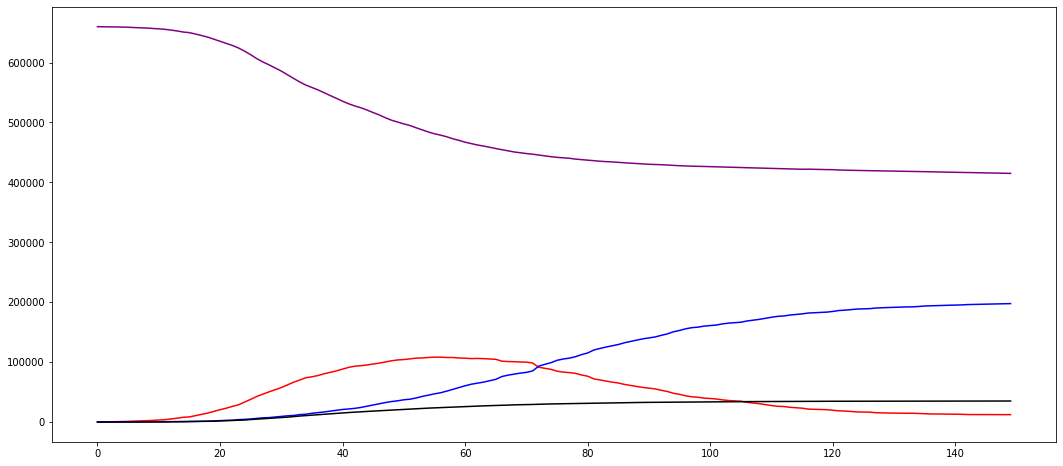

In [25]:
fig,ax = sird.displayData(suscept, infect, recov, dead, graphVals=[1,1,1,1])

linVars = sird.getLinVars(suscept, infect, recov, dead)
print(linVars)

(<Figure size 1296x576 with 1 Axes>, <AxesSubplot:>)

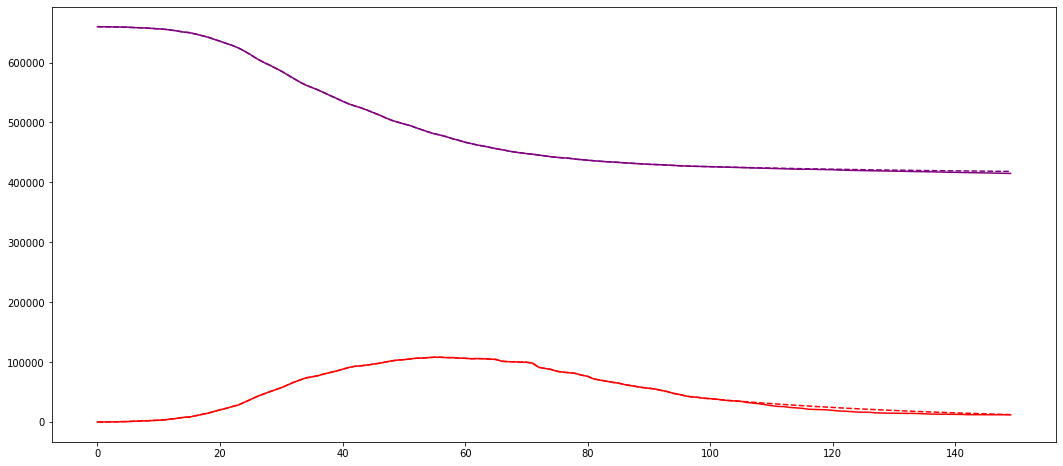

In [32]:
sird.predictMatch(suscept, infect, recov, dead, 50, graphVals=[1,1,0,0])

In [1]:
#import SAIRD_Feedback as SAIRD_fm
import SIRD_Model as sird
import SIRD_Feedback_Delay as sird_fb_delay

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [10]:
sird_fb_delay.regularizer = 10
sird_fb_delay.weightDecay = .9

sird_fb_delay.delay = 21

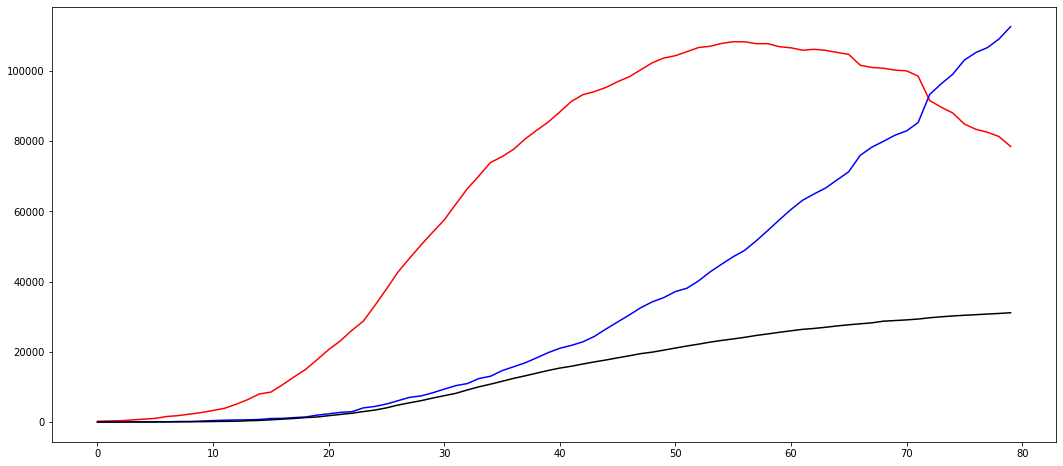

In [7]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "AZ.csv"
dates, infectRaw, recovRaw, deadRaw = sird.loadData(pathc + filename)
#recovRaw = SIRD_Model.approxRecovered(infectRaw, deadRaw)
#infectRaw = infectRaw - deadRaw - recovRaw

#set up day range
pop = 60000000 #for italy
skipDays = 0
numDays = 80 #len(infectRaw) #just to get initial beginning data
daysToPredict = 45
#asympt = asymptRaw[skipDays:numDays]
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]


fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect, "red")
ax.plot(recov, "blue")
ax.plot(dead, "black")

[0.0173213892619152, 0.017321389261915208, 0.022448121461986197, 0.005241644359216902]
5771055.3303699875


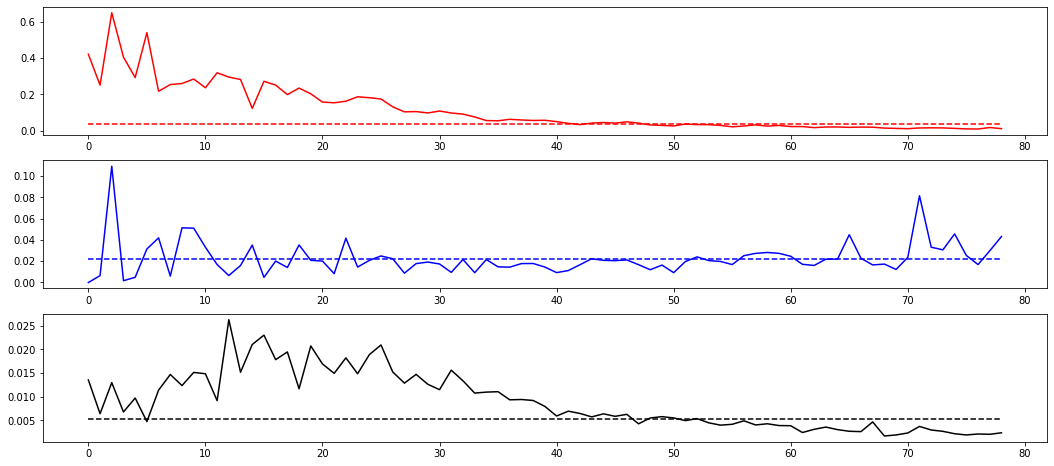

In [12]:

q = .09
betaNonLin = [0, 2]

linVars = sird_fb_delay.getLinVars(infect,recov,dead, q,pop, betaNonLin)

timeVars, figVars, axVars = sird.solveTimeVars(q,pop, infect, recov, dead, graph=True)

print(linVars)

betaTime = sird_fb_delay.calculateBeta(betaNonLin, linVars, q,pop, infect)
axVars[0].plot(betaTime, color="red", linestyle='dashed')
gammaExtended = np.ones(len(timeVars[:,1]))*linVars[-2] #make list of length T for constant line ploting
axVars[1].plot(gammaExtended, color="blue", linestyle='dashed')
nuExtended = np.ones(len(timeVars[:,2]))*linVars[-1] #make list of length T for constant line ploting
axVars[2].plot(nuExtended, color="black", linestyle='dashed')

print(sird_fb_delay.errorFunc(betaNonLin, linVars, q, pop, infect, recov, dead))

In [15]:
qConstraint = (.09, .09) #(.01, 1)
b1Constraint = (0, 5000)
b2Constraint = (1, 10)

varResolution = [1, 1000, 25]
nonLinConstrain = [qConstraint, b1Constraint, b2Constraint]

nonLinVars, linVars = sird_fb_delay.solveAllVars(nonLinConstrain, varResolution, pop, infect, recov, dead)

q = nonLinVars[0]
betaNonLin = nonLinVars[1:]

Solution: 
q:   0.09
b2:  3660.0
b3:  1
b0:  0.034110914646730627
b1:  0.15823243602439965
g:   0.022448121461986197
nu:  0.005241644359216902
cost:  3021851.6192321493



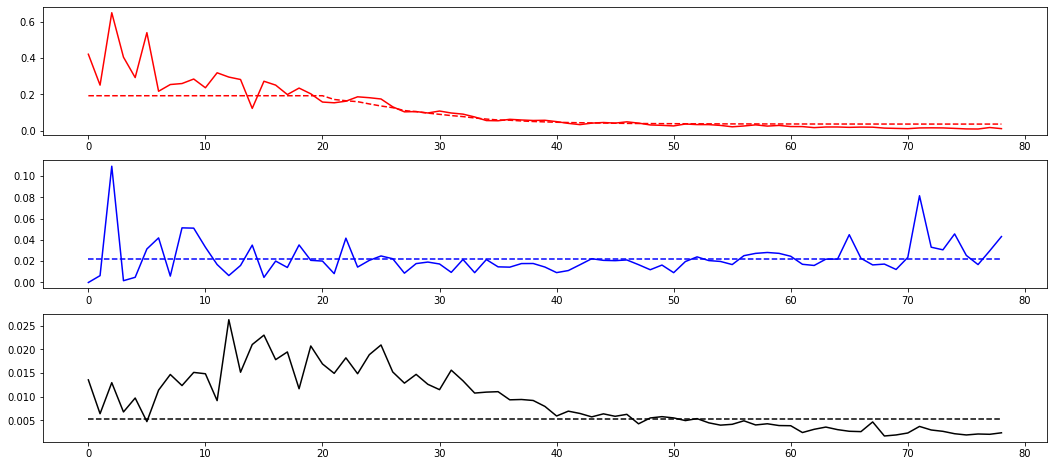

In [17]:
timeVars, figVars, axVars = sird.solveTimeVars(q,pop, infect, recov, dead, graph=True)

betaTime = sird_fb_delay.calculateBeta(betaNonLin, linVars, q,pop, infect)
axVars[0].plot(betaTime, color="red", linestyle='dashed')
gammaExtended = np.ones(len(timeVars[:,1]))*linVars[-2] #make list of length T for constant line ploting
axVars[1].plot(gammaExtended, color="blue", linestyle='dashed')
nuExtended = np.ones(len(timeVars[:,2]))*linVars[-1] #make list of length T for constant line ploting
axVars[2].plot(nuExtended, color="black", linestyle='dashed')